In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv('train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df['Loan_Status'].drop_duplicates()

0    Y
1    N
Name: Loan_Status, dtype: object

In [4]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [5]:
#df['Loan_Status'] = df['Loan_Status'].replace({'Y':1,'N':0}, inplace=True)
df['Loan_Status'] = np.where(df['Loan_Status'] == 'Y',1,0)

In [6]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [7]:
train, test = train_test_split(df,test_size=0.2, random_state=0)

In [8]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
90,LP001316,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban,1
533,LP002729,Male,No,1,Graduate,No,11250,0.0,196.0,360.0,NaN,Semiurban,0
452,LP002448,Male,Yes,0,Graduate,No,3948,1733.0,149.0,360.0,0.0,Rural,0
355,LP002144,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,1
266,LP001877,Male,Yes,2,Graduate,No,4708,1387.0,150.0,360.0,1.0,Semiurban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,LP001904,Male,Yes,0,Graduate,No,3103,1300.0,80.0,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0
359,LP002160,Male,Yes,3+,Graduate,No,5167,3167.0,200.0,360.0,1.0,Semiurban,1
192,LP001657,Male,Yes,0,Not Graduate,No,6033,0.0,160.0,360.0,1.0,Urban,0


In [9]:
train = train.drop(['Loan_ID'],axis=1)
test = test.drop(['Loan_ID'],axis=1)

In [10]:
pd.isna(train).sum().to_frame("Valor Vazio")

,Valor Vazio
Gender,12
Married,3
Dependents,15
Education,0
Self_Employed,28
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,20
Loan_Amount_Term,11
Credit_History,41


In [11]:
train = train.dropna(how='any')
test = test.dropna(how='any')

In [12]:
train.count()

Gender               375
Married              375
Dependents           375
Education            375
Self_Employed        375
ApplicantIncome      375
CoapplicantIncome    375
LoanAmount           375
Loan_Amount_Term     375
Credit_History       375
Property_Area        375
Loan_Status          375
dtype: int64

In [13]:
test.count()

Gender               105
Married              105
Dependents           105
Education            105
Self_Employed        105
ApplicantIncome      105
CoapplicantIncome    105
LoanAmount           105
Loan_Amount_Term     105
Credit_History       105
Property_Area        105
Loan_Status          105
dtype: int64

In [15]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [16]:
train=pd.get_dummies(train, columns=['Gender', 'Married', 'Education','Self_Employed','Property_Area', 'Dependents'])
test=pd.get_dummies(test, columns=['Gender', 'Married', 'Education','Self_Employed','Property_Area', 'Dependents'])

In [20]:
test.shape[1] == train.shape[1]

True

In [21]:
train_x = train.drop(columns=['Loan_Status'],axis=1)
train_y = train['Loan_Status']

test_x = test.drop(columns=['Loan_Status'],axis=1)
test_y = test['Loan_Status']

In [24]:
LR = LogisticRegression(solver='lbfgs', max_iter=1000).fit(train_x,train_y)
LDA = LinearDiscriminantAnalysis().fit(train_x,train_y)
DT =DecisionTreeClassifier().fit(train_x,train_y)
KN = KNeighborsClassifier().fit(train_x,train_y)
SVM = SVC().fit(train_x,train_y)
RF = RandomForestClassifier().fit(train_x,train_y)

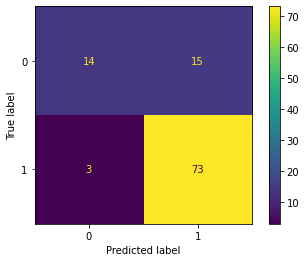

In [25]:
plot_confusion_matrix(LR,test_x,test_y)
plt.show()

In [26]:
print("Acurácia LR:", LR.score(test_x,test_y),"\n")
print("Acurácia LDA:", LDA.score(test_x,test_y),"\n")
print("Acurácia DT:", DT.score(test_x,test_y),"\n")
print("Acurácia KN:", KN.score(test_x,test_y),"\n")
print("Acurácia SVM:", SVM.score(test_x,test_y),"\n")
print("Acurácia RF:", RF.score(test_x,test_y),"\n")

Acurácia LR: 0.8285714285714286 

Acurácia LDA: 0.8380952380952381 

Acurácia DT: 0.6476190476190476 

Acurácia KN: 0.638095238095238 

Acurácia SVM: 0.7238095238095238 

Acurácia RF: 0.7619047619047619 



In [29]:
metricas = {'Accuracy':[LR.score(test_x,test_y),
                       LDA.score(test_x,test_y),
                       DT.score(test_x,test_y),
                       KN.score(test_x,test_y),
                       SVM.score(test_x,test_y),
                       RF.score(test_x,test_y)],
           'Precision': [precision_score(test_y,LR.predict(test_x)),
                       precision_score(test_y,LDA.predict(test_x)),
                       precision_score(test_y,DT.predict(test_x)),
                       precision_score(test_y,KN.predict(test_x)),
                       precision_score(test_y,SVM.predict(test_x)),
                       precision_score(test_y,RF.predict(test_x))],
           'Recall':[recall_score(test_y,LR.predict(test_x)),
                       recall_score(test_y,LDA.predict(test_x)),
                       recall_score(test_y,DT.predict(test_x)),
                       recall_score(test_y,KN.predict(test_x)),
                       recall_score(test_y,SVM.predict(test_x)),
                       recall_score(test_y,RF.predict(test_x))]
           }
dados = pd.DataFrame(metricas, columns = ['Accuracy', 'Precision', 'Recall'], 
                     index=['LR','LDA','DT','KN','SVM','RF'])
dados

,Accuracy,Precision,Recall
LR,0.828571,0.829545,0.960526
LDA,0.838095,0.831461,0.973684
DT,0.647619,0.791045,0.697368
KN,0.638095,0.720930,0.815789
SVM,0.723810,0.723810,1.000000
RF,0.761905,0.814815,0.868421


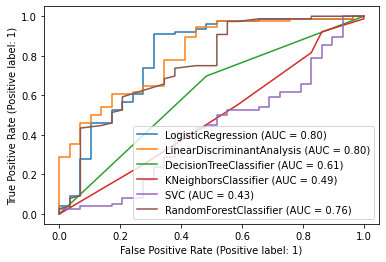

In [30]:
plot_roc_curve(LR,test_x,test_y,ax=plt.gca())
plot_roc_curve(LDA,test_x,test_y,ax=plt.gca())
plot_roc_curve(DT,test_x,test_y,ax=plt.gca())
plot_roc_curve(KN,test_x,test_y,ax=plt.gca())
plot_roc_curve(SVM,test_x,test_y,ax=plt.gca())
plot_roc_curve(RF,test_x,test_y,ax=plt.gca())